In [13]:
fn1 = 'mael'
ln1 = 'mathevet'
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)

sd-tsia204_lab2_mathevet_mael.ipynb


In [14]:
import numpy as np
import sklearn as sk
import pandas as pd
import sklearn.datasets as sd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

## Question 1

In [15]:
#a)
dataset = sd.fetch_california_housing(as_frame=True)
dfx = dataset.data
dfx.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
dfy = dataset.target
dfy.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [17]:
def R2(y,y_est):
    ym = y.mean()
    ymvect = ym*np.ones(len(y))
    return 1-(np.linalg.norm(y-y_est)/np.linalg.norm(y-ymvect))**2

def MSE(y,y_est):
    return 1/len(y)*(((y-y_est)**2).sum())

x_cali,y_cali = dfx.to_numpy(),dfy.to_numpy()
print(x_cali.shape)
print(y_cali.shape)

theta_est = np.matmul(np.linalg.inv(np.matmul(x_cali.T,x_cali)),np.matmul(x_cali.T,y_cali))
y_est_cali = np.matmul(x_cali,theta_est)

print("By hand: R² =",R2(y_cali,y_est_cali))
print("By hand: MSE=", MSE(y_cali,y_est_cali))
print("With sk: R² =",r2_score(y_cali,y_est_cali))
print("With sk: MSE =",mean_squared_error(y_cali,y_est_cali))

(20640, 8)
(20640,)
By hand: R² = 0.5462360656980103
By hand: MSE= 0.6042095028861159
With sk: R² = 0.5462360656980104
With sk: MSE = 0.6042095028861159


The metric functions seen in class are indeed the same as those implemented in sklearn

In [18]:
#b)
n = len(y_cali)-np.linalg.matrix_rank(x_cali)
sig2 = 1/(n)*np.linalg.norm(y_cali-np.matmul(x_cali,theta_est))**2
sig = np.sqrt(sig2)
xxtinv = np.linalg.inv(np.matmul(x_cali.T,x_cali))
alpha = 0.01

def quant(level):
    return t.ppf(1-level/2,n)

quantile = quant(alpha)

def CI(indice):
    coeff = theta_est[indice]
    print("Confidende interval at level ",100*(1-alpha),"% ","for the ",indice,"-th parameter : [",coeff-quantile*sig*np.sqrt(xxtinv[indice][indice]),";",coeff+quantile*sig*np.sqrt(xxtinv[indice][indice]),"]")

for i in range(len(theta_est)):
    CI(i)

Confidende interval at level  99.0 %  for the  0 -th parameter : [ 0.5025457008724805 ; 0.5244846255138436 ]
Confidende interval at level  99.0 %  for the  1 -th parameter : [ 0.014455695388922737 ; 0.016846526486366458 ]
Confidende interval at level  99.0 %  for the  2 -th parameter : [ -0.19837475284600117 ; -0.1666817856966449 ]
Confidende interval at level  99.0 %  for the  3 -th parameter : [ 0.7880581766228657 ; 0.9421399366670785 ]
Confidende interval at level  99.0 %  for the  4 -th parameter : [ -5.327807059420282e-06 ; 2.0912420189823412e-05 ]
Confidende interval at level  99.0 %  for the  5 -th parameter : [ -0.0060463849976543855 ; -0.003352194703847267 ]
Confidende interval at level  99.0 %  for the  6 -th parameter : [ -0.07318659017302889 ; -0.05470504955884211 ]
Confidende interval at level  99.0 %  for the  7 -th parameter : [ -0.019317285183845265 ; -0.013448150167981702 ]


## Question 2

In [19]:
#a)
np.random.seed(0)

In [20]:
#b)
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [21]:
x = data.loc[:,data.columns !=210].to_numpy()
y = data[210].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

In [22]:
print(x_train.shape)

(331, 210)


In [23]:
#c)
ols = LinearRegression()
est_ols = ols.fit(x_train,y_train)
print("R² =",est_ols.score(x_train,y_train))

R² = 0.5556910813389775


## Question 3

In [24]:
#a)
def extract_feature(X,y,iter):#Suppose X and y are centered and scaled numpy arrays
    best_feature = []
    min_p = 2
    best_indice = 0
    abscisses = np.arange(X.shape[1])
    ps = []
    xtxm1 = np.linalg.inv(np.matmul(X.T,X))
    for i in abscisses:
        Xi = X[:,i].reshape(-1,1)
        reg = LinearRegression().fit(Xi,y)
        t1 = reg.coef_[0]
        #t0 = reg.intercept_
        #theta = np.array([t0,t1])
        n = len(Xi)
        sig = np.sqrt(1/(n-2)*np.linalg.norm(y-t1*Xi)**2)
        Ti = np.abs(t1)/(sig*np.sqrt(np.abs(xtxm1[i,i])))
        pi = 2*(1-t.cdf(Ti,n-2))
        ps.append(pi)
        if(pi<min_p):
            min_p = pi
            best_feature = Xi
            best_indice = i
    if( iter< 5):
        plt.plot(abscisses,ps, label=str(iter))
        
    return best_feature, best_indice, min_p, t1

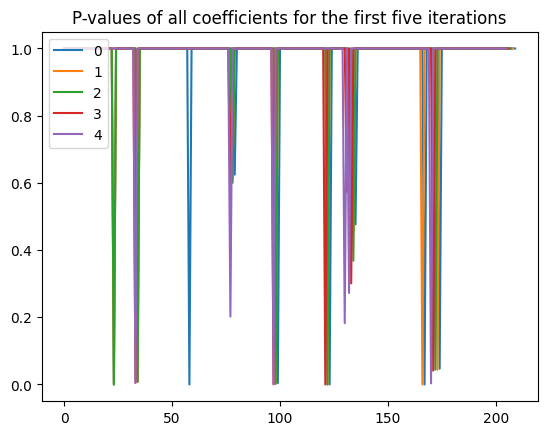

In [25]:
#b) and c)
#Suppose X and y are centered and scaled numpy arrays
X,y = x_train.copy(),y_train.copy()
S= []
p_set=[0]
param = []
i=0
while(p_set[i]<= 0.05):
    feature,indice,p_val,parameter = extract_feature(X,y,i)
    S.append(feature)
    p_set.append(p_val)
    #param[j] = par
    param.append(parameter)
    X = np.delete(X,indice,1)
    y = y-parameter*S[i]
    i += 1
plt.legend(loc='upper left')
plt.title("P-values of all coefficients for the first five iterations")
plt.show()




## Question 4

In [26]:
def regularized_regression(method,first,last):# method can either be 'ridge','lasso' or 'elasticnet', first and last are the log of the first and last penalty parameter
    X,y = x_train.copy(),y_train.copy()
    Xt,yt = x_test.copy(),y_test.copy()
    penalty_params = np.logspace(first,last,30)
    fig,ax = plt.subplots(2,1,figsize=(16,9))

    coeff_l = [[] for _ in range(210)]
    score_l = []

    for l in penalty_params:
        if method == 'ridge':
            reg = Ridge(alpha=l).fit(X,y)
        elif method == 'lasso':
            reg = Lasso(alpha=l).fit(X,y)
        elif method == 'elasticnet':
            reg = ElasticNet(alpha=l).fit(X,y)
        else :
            print("Error, invalid method")
            break
        score_l.append(reg.score(Xt,yt))
        coeffs = reg.coef_.reshape(210)
        for i in range(210):
            coeff_l[i].append(coeffs[i])

    print("Method used:",method)
    for i in range(210):
        ax[0].plot(penalty_params,coeff_l[i])
    ax[1].plot(penalty_params,score_l)
    ax[0].set_title(r"Evolution of parameters $\theta_k$")
    ax[1].set_title("Evolution of R²")
    ax[0].set_xscale('log')
    ax[1].set_xscale('log')
    plt.show()
    return coeff_l,score_l

Method used: ridge


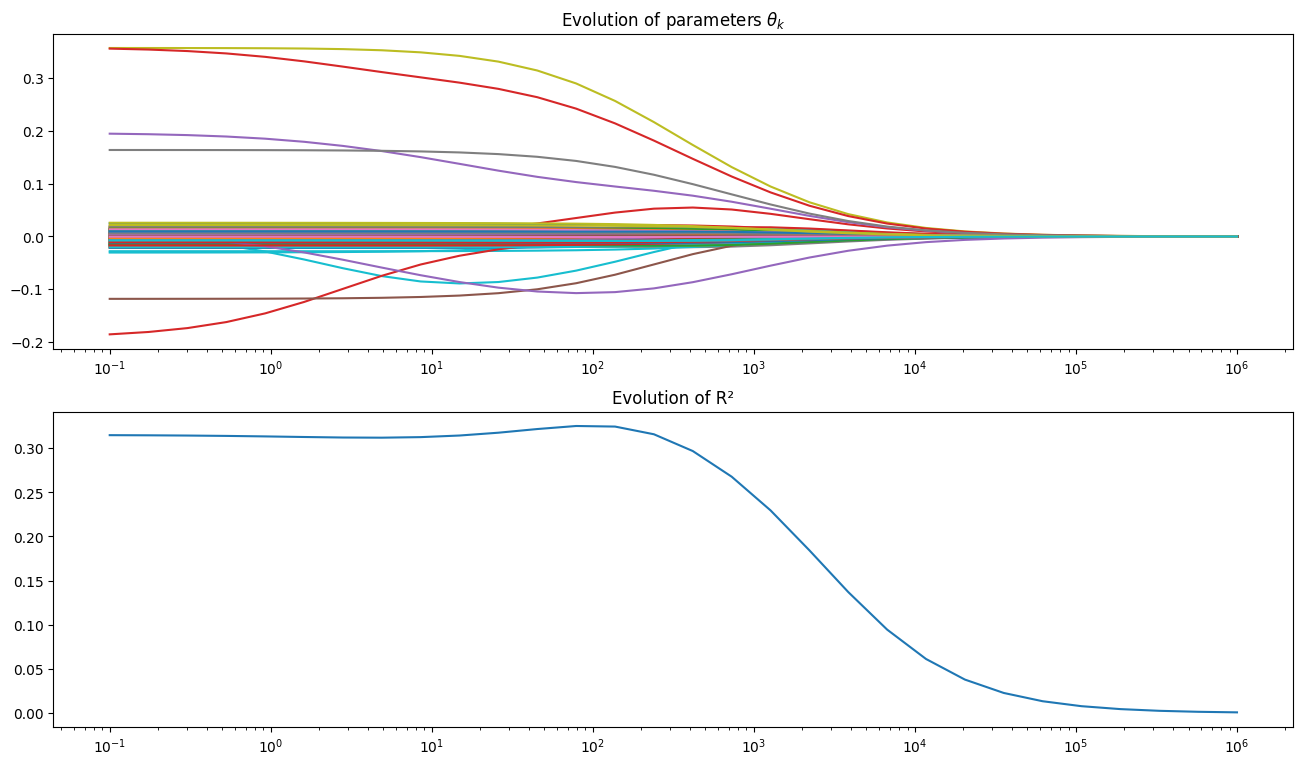

In [27]:
coeffs_ridge,scores_ridge = regularized_regression('ridge',-1,6)

## Question 5

Method used: lasso


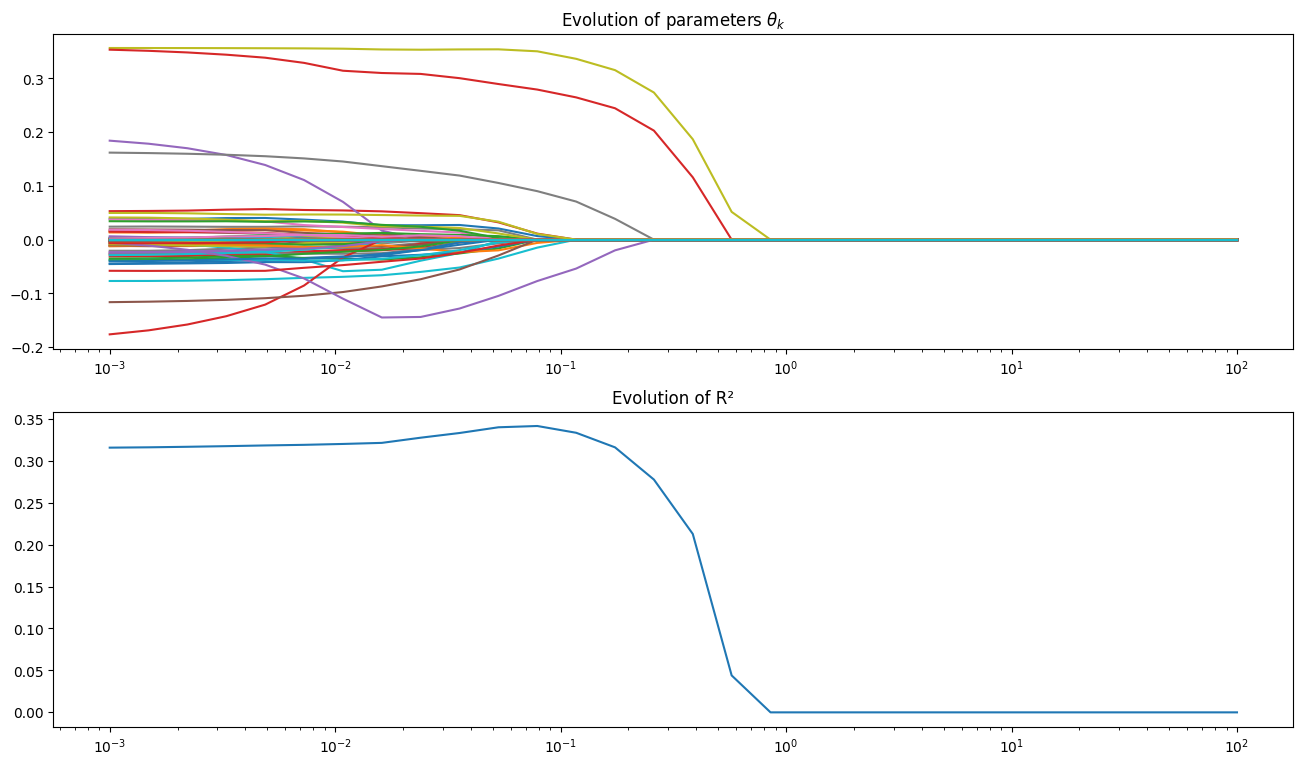

In [28]:
coeffs_lasso,scores_lasso = regularized_regression('lasso',-3,2)

## Question 6

Method used: elasticnet


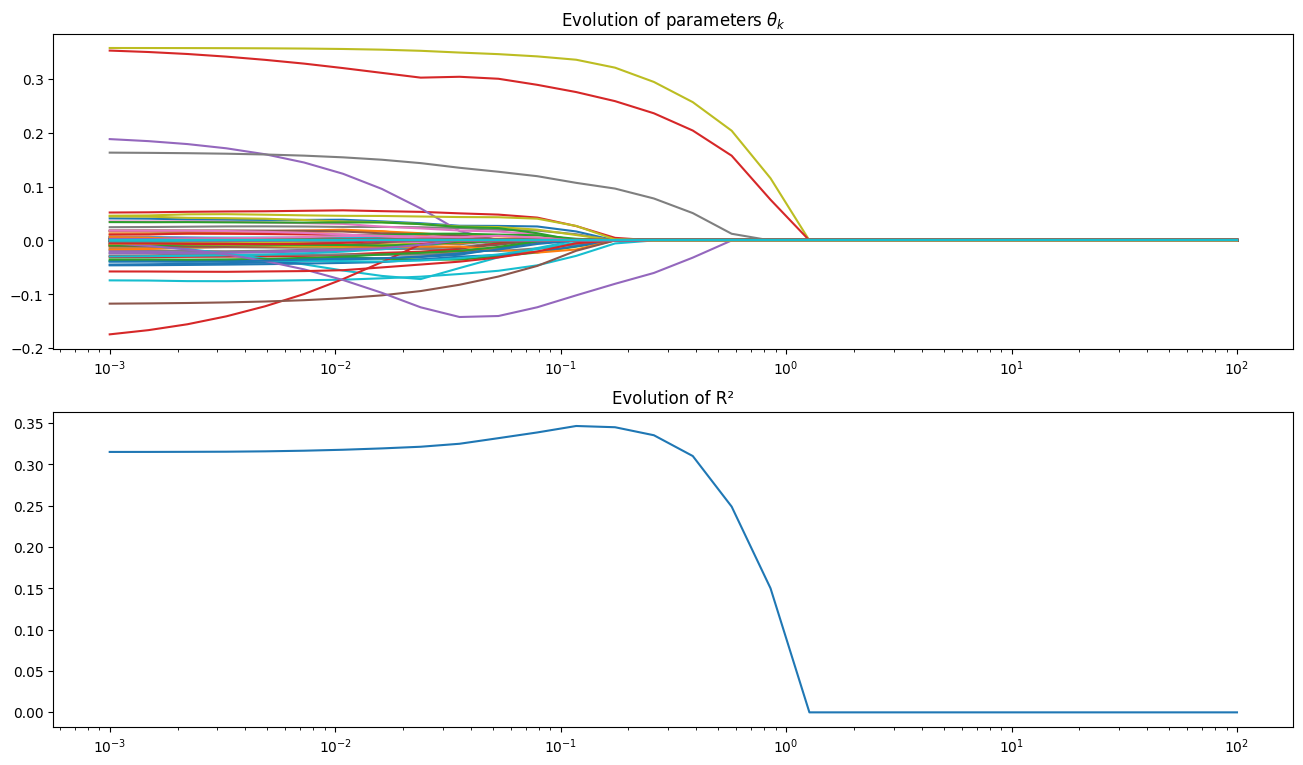

In [29]:
coeffs_elasticnet,scores_elasticnet = regularized_regression('elasticnet',-3,2)

## Question 7

(-0.5, 209.5, 209.5, -0.5)

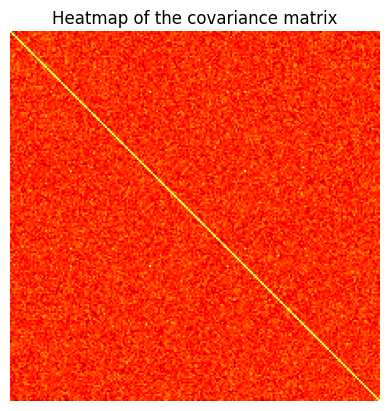

In [30]:
#a)
X = x_train.copy()
covmat = np.cov(X.T)
plt.imshow(covmat, cmap='hot')
plt.title("Heatmap of the covariance matrix")
plt.axis('off')

In [31]:
#b)
def PCA(X):
    covmat = np.cov(X.T)
    u,s,v = np.linalg.svd(covmat)# Eigenvalues are sorted from highest to lowest in s
    #print(np.matmul(covmat,u.T[0])[0]) first colum of u is the first eigenvector of covmat
    #print(s[0]*u[0][0])
    return np.matmul(X,u).T,s # This is an array containing the columns (thanks to the transposition) of XU that is the principal components

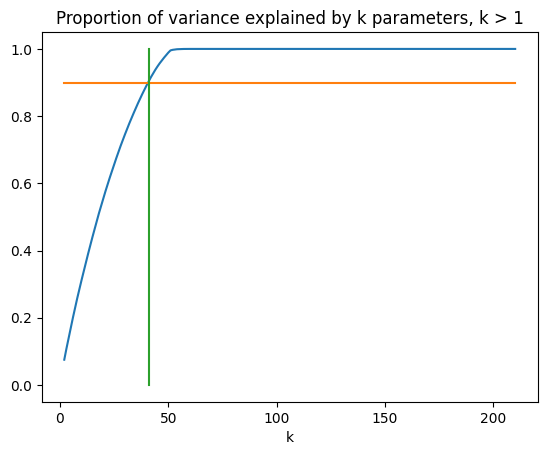

we need at least 41  variables in order to explain more than 90% of the variance
0.9042032712496287


In [32]:
#c)
principal_components, s = PCA(X)

explained_var = np.cumsum(s**2)/np.sum(s**2)
explained_var = np.append(0,explained_var)
plt.plot(np.linspace(2,210,209),explained_var[2:])
plt.plot(np.linspace(2,210,209),0.9*np.ones(209))
var = 0
val = explained_var[var]
while(val<0.9):
    var +=1
    val = explained_var[var]
plt.plot(var*np.ones(209),np.linspace(0,1,209))
plt.title("Proportion of variance explained by k parameters, k > 1")
plt.xlabel("k")
plt.show()
print("we need at least", var," variables in order to explain more than 90% of the variance")
print(explained_var[var])

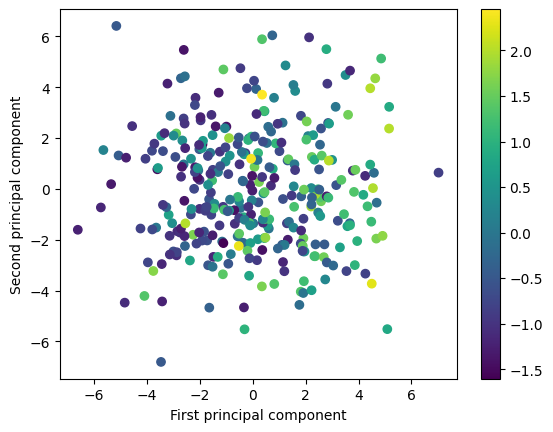

We remember that the first two components explain  7.504444695509626 % of the variance


In [33]:
#d)
y = y_train.copy()
PC1 = principal_components[0]
PC2 = principal_components[1]
plt.scatter(PC1,PC2,c=y)
plt.colorbar()
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()
print("We remember that the first two components explain ",100*explained_var[2],"% of the variance")

There are points of all colors pretty much everywhere in the above picture, except maybe for the fact that points on the right are in general lighter (have a higher value) than points on the left. This is not surprising since the first two components are only able to explain 7% of the variance.

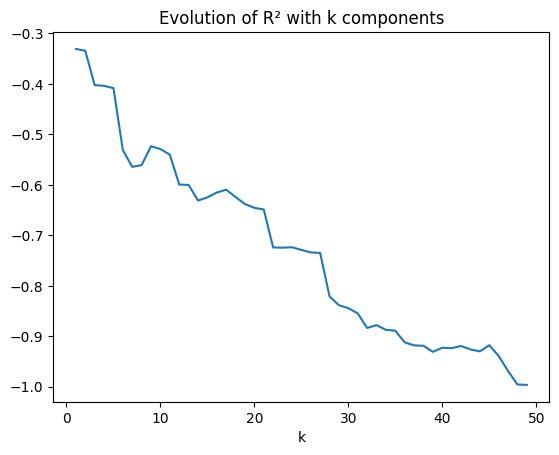

The number of features that yields the estimator with the best score is: 1 and the associated R² score is: -0.3305800234111025


In [34]:
#e)
features = principal_components.T
xt = PCA(x_test.copy())[0].T
yt = y_test.copy()
r2_list=[]
for k in range(1,50):
    reg = LinearRegression().fit(features[:,:k],y)
    r2_list.append(reg.score(xt[:,:k],yt))

plt.plot(np.linspace(1,49,49),r2_list)
plt.title('Evolution of R² with k components')
plt.xlabel("k")
plt.show()
bestk = np.argmax(np.array(r2_list))
print("The number of features that yields the estimator with the best score is:",bestk+1,"and the associated R² score is:",r2_list[bestk])
    

## Question 8

In [37]:
#Summarize all data from every part of the lab
trainx,trainy,testx,testy= x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

#Q1
mse_cali = mean_squared_error(y_cali,y_est_cali)
r2_cali = r2_score(y_cali,y_est_cali)

#Q2
y_est_ols = np.matmul(trainx,est_ols.coef_.reshape(210))
mse_ols_train = mean_squared_error(trainy,y_est_ols)
r2_ols = r2_score(trainy,y_est_ols)

#Q3
x_fs = np.array(S).reshape(10,331).T #Construct x whose columns are the features extracted in S
param_fs= np.array(param).reshape(10)
y_est_fs = np.matmul(x_fs,param_fs)
mse_fs_train = mean_squared_error(trainy,y_est_fs)
r2_fs = r2_score(trainy,y_est_fs)

#Q4
ridge_scores = np.array(scores_ridge)
ind_ridge = np.argmax(ridge_scores)
params_ridge = np.array(coeffs_ridge)[:,ind_ridge]
y_est_ridge = np.matmul(trainx,params_ridge)
mse_ridge_train = mean_squared_error(trainy,y_est_ridge)
r2_ridge = r2_score(trainy,y_est_ridge)

#Q5
lasso_scores = np.array(scores_lasso)
ind_lasso = np.argmax(lasso_scores)
params_lasso = np.array(coeffs_lasso)[:,ind_lasso]
y_est_lasso = np.matmul(trainx,params_lasso)
mse_lasso_train = mean_squared_error(trainy,y_est_lasso)
r2_lasso = r2_score(trainy,y_est_lasso)

#Q6
elasticnet_scores = np.array(scores_elasticnet)
ind_elasticnet = np.argmax(elasticnet_scores)
params_elasticnet = np.array(coeffs_elasticnet)[:,ind_elasticnet]
y_est_elasticnet = np.matmul(trainx,params_elasticnet)
mse_elasticnet_train = mean_squared_error(trainy,y_est_elasticnet)
r2_elasticnet = r2_score(trainy,y_est_elasticnet)

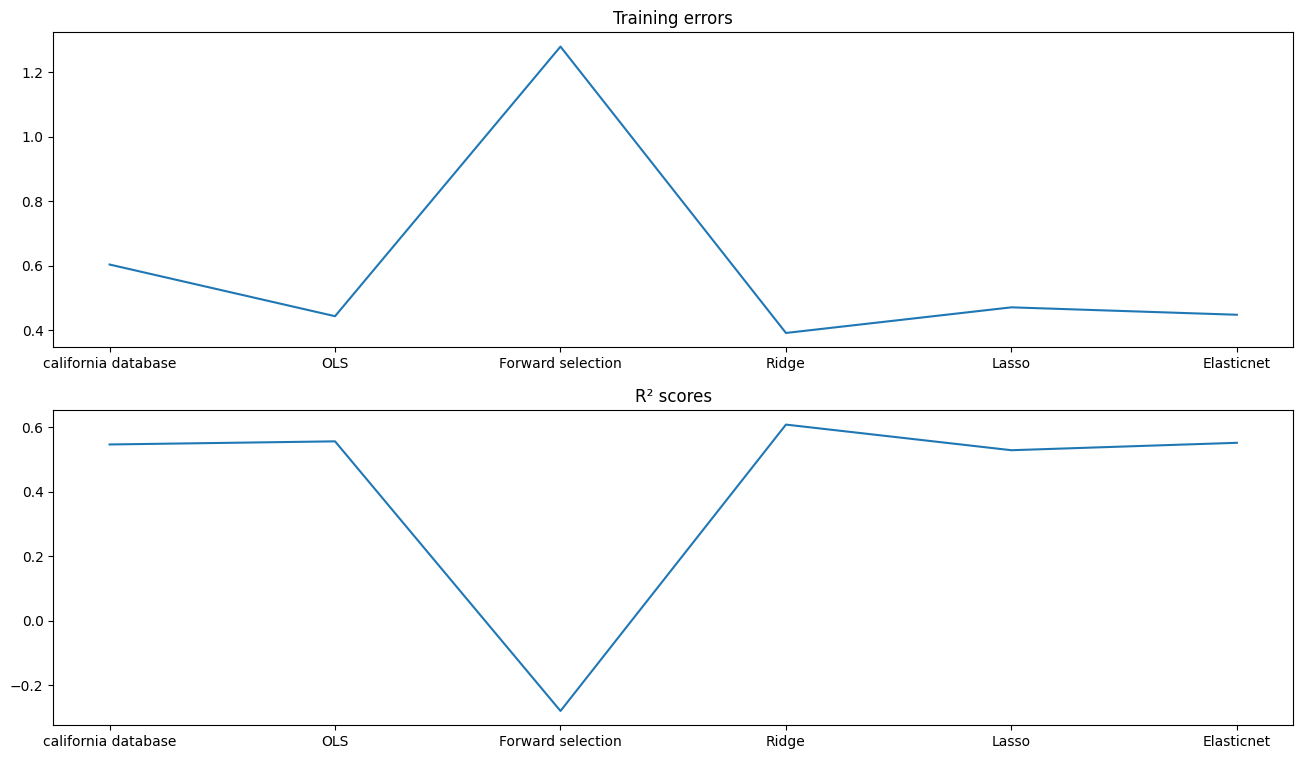

In [38]:
train_errors = [mse_cali,mse_ols_train,mse_fs_train,mse_ridge_train,mse_lasso_train,mse_elasticnet_train]
r2_scores = [r2_cali,r2_ols,r2_fs,r2_ridge,r2_lasso,r2_elasticnet]
absi = ["california database","OLS","Forward selection","Ridge","Lasso","Elasticnet"]
fig,ax = plt.subplots(2,1,figsize =(16,9))
ax[0].set_title("Training errors")
ax[1].set_title("R² scores")
ax[0].plot(absi,train_errors)
ax[1].plot(absi,r2_scores)
plt.show()

The ordinary least square method is by far the fastest one, followed by ElasticNet, then Lasso, then Ridge and finally Forward Selection. This last one is the one with the highest MSE, which is normal since it is just the OLS method but with only the best components. Thus it cannot give a better result than OLS.\
We can observe on the graph above that most of the time, the lower the MSE is, the higher the associated R² score is. The two curves are almost mirrors of each other and let us easily see that the Ridge model is overall the best one on the proposed dataset while still being pretty fast - it took 2.8 seconds to compute for almost 400 data points.